# Fractional Brownian Motion Ensembles

Ensemble simulations that scan H values are used to validate second order moment calculations.

## Imports

In [17]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import config
from lib import stats

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Plots

In [22]:
def ensemble_plot(samples, time, text_pos, title):
    nsim, npts = samples.shape
    figure, axis = pyplot.subplots(figsize=(12, 8))
    axis.set_xlabel("Time")
    axis.set_title(title)
    stats=f"Simulation Stats\n\nμ={format(numpy.mean(samples[:,-1]), '2.2f')}\nσ={format(numpy.std(samples[:,-1]), '2.2f')}"
    bbox = dict(boxstyle='square,pad=1', facecolor="#FFFFFF", edgecolor="#FFFFFF", alpha=0.75)
    axis.text(text_pos[0], text_pos[1], stats, fontsize=15, bbox=bbox)
    for i in range(nsim):
        axis.plot(time, samples[i], lw=1)

def ensemble_mean_plot(mean, time, title):
    figure, axis = pyplot.subplots(figsize=(12, 8))
    axis.set_xlabel("Time")
    axis.set_title(title)
    axis.plot(time, mean)

def ensemble_std_plot(H, std, time, lengend_location, title):
    figure, axis = pyplot.subplots(figsize=(12, 8))
    step = int(len(time) / 10)
    axis.set_xlabel("Time")
    axis.set_title(title)
    axis.plot(time, std, label="Ensemble Average")
    axis.plot(time[::step], time[::step]**H, label=r"$t^{H}$", marker='o', linestyle="None", markeredgewidth=1.0, markersize=15.0)
    axis.legend(bbox_to_anchor=lengend_location)

def ensemble_autocorrelation_plot(H, ac, time, lengend_location, title):
    figure, axis = pyplot.subplots(figsize=(12, 8))
    step = int(len(time) / 10)
    axis.set_ylim([-1.0, 1.0])
    axis.set_xlabel("Time")
    axis.set_title(title)
    label = r"$\frac{1}{2}[(t-1)^{2H} + (t+1)^{2H} - 2t^{2H})]$"
    axis.plot(time, ac, label="Ensemble Average")
    axis.plot(time[1::step], fbm.autocorrelation(H, time[1::step]), label=label, marker='o', linestyle="None", markeredgewidth=1.0, markersize=15.0)
    axis.legend(bbox_to_anchor=lengend_location)


## Helpers

In [11]:
Δt = 1.0
npts = 1024
nsims = 500
time = numpy.linspace(0.0, float(npts)*Δt, npts)

def generate_ensemble(H):
    samples = numpy.array([fbm.generate_fft(H, npts, Δt)])
    for i in range(1, nsims):
        samples = numpy.append(samples, numpy.array([fbm.generate_fft(H, npts, Δt)]), axis=0)
    return samples

## H=0.5 (Brownian Motion)

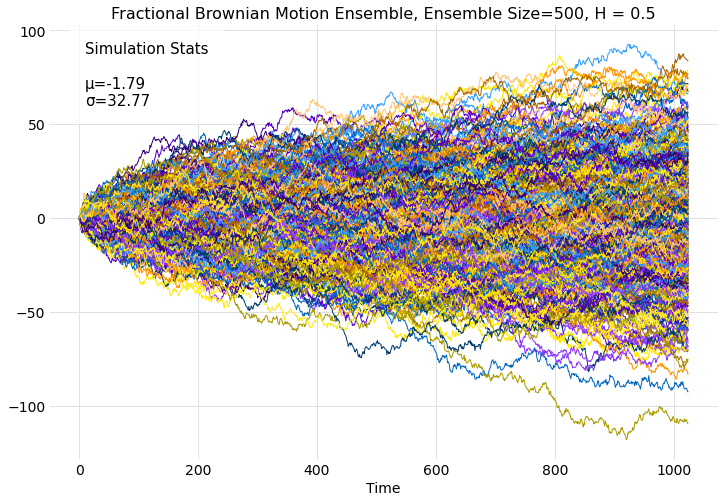

In [12]:
H=0.5
title = f"Fractional Brownian Motion Ensemble, Ensemble Size={nsims}, H = {format(H, '1.1f')}"
samples = generate_ensemble(H)
ensemble_plot(samples, time, [10.0, 60.0], title)

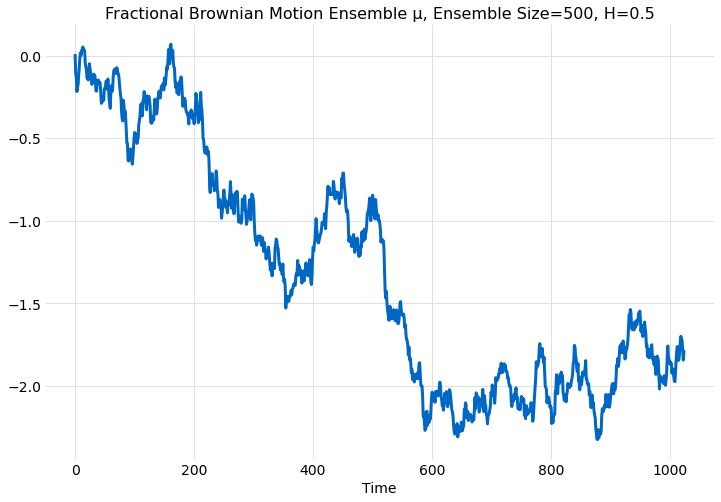

In [13]:
mean = stats.ensemble_mean(samples)
title = f"Fractional Brownian Motion Ensemble μ, Ensemble Size={nsims}, H={format(H, '1.1f')}"
ensemble_mean_plot(mean, time, title)

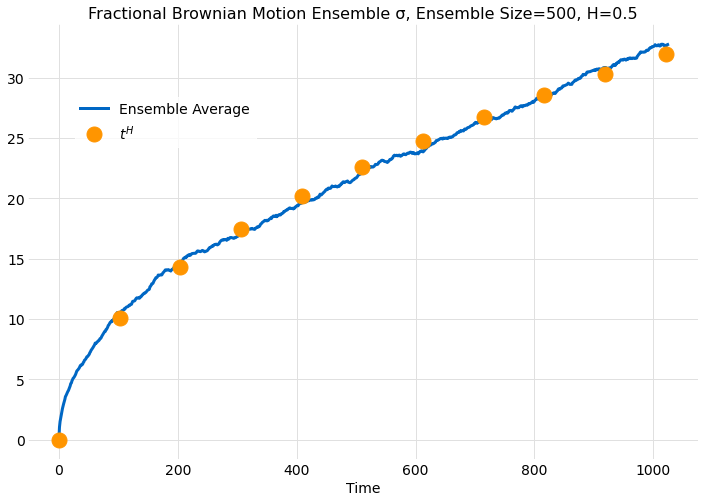

In [14]:
std = stats.ensemble_std(samples)
title = f"Fractional Brownian Motion Ensemble σ, Ensemble Size={nsims}, H={format(H, '1.1f')}"
ensemble_std_plot(H, std, time, [0.35, 0.85], title)

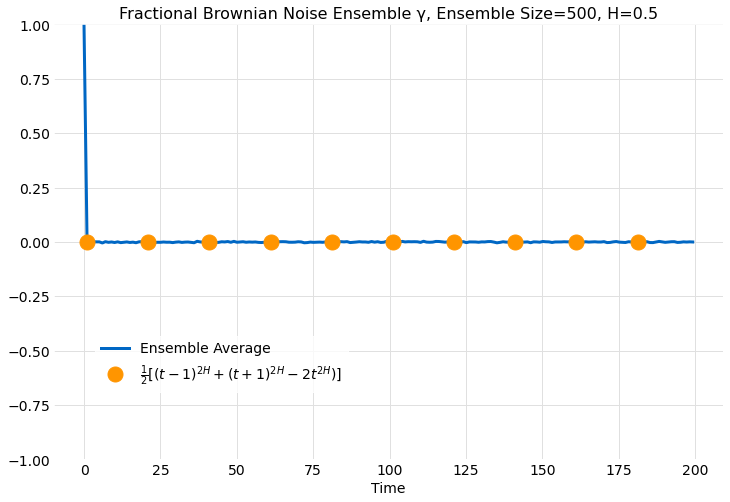

In [23]:
ac = stats.ensemble_autocorrelation(fbm.to_noise(samples))
title = f"Fractional Brownian Noise Ensemble γ, Ensemble Size={nsims}, H={format(H, '1.1f')}"
ensemble_autocorrelation_plot(H, ac[:200], time[:200], [0.45, 0.3], title)

## H = 0.7

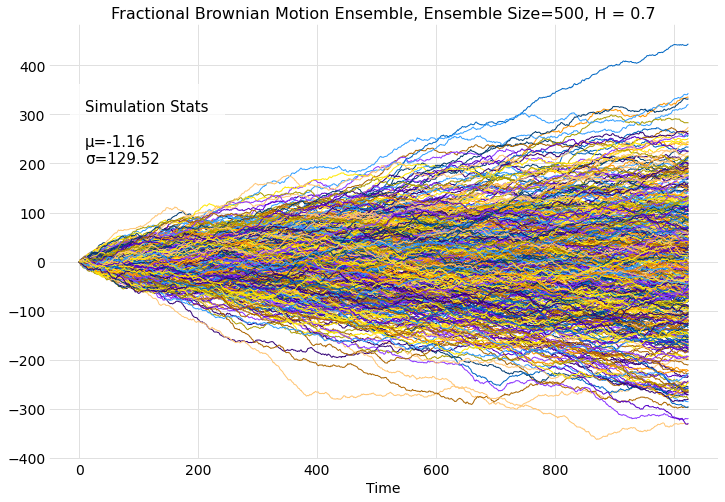

In [26]:
H=0.7
title = f"Fractional Brownian Motion Ensemble, Ensemble Size={nsims}, H = {format(H, '1.1f')}"
samples = generate_ensemble(H)
ensemble_plot(samples, time, [10.0, 200.0], title)

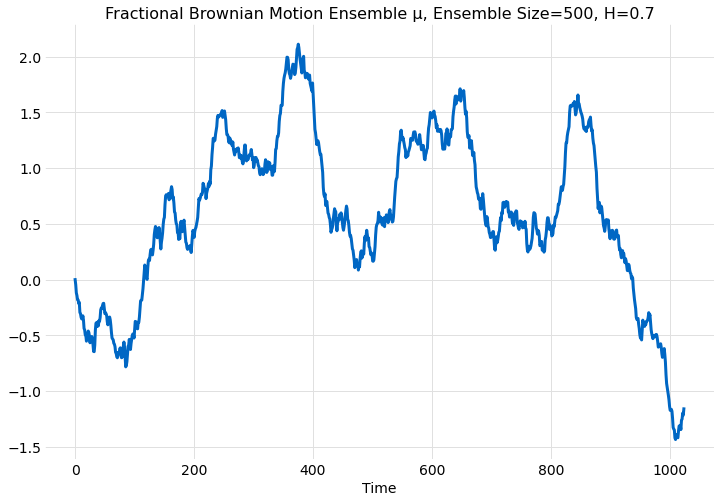

In [27]:
mean = stats.ensemble_mean(samples)
title = f"Fractional Brownian Motion Ensemble μ, Ensemble Size={nsims}, H={format(H, '1.1f')}"
ensemble_mean_plot(mean, time, title)

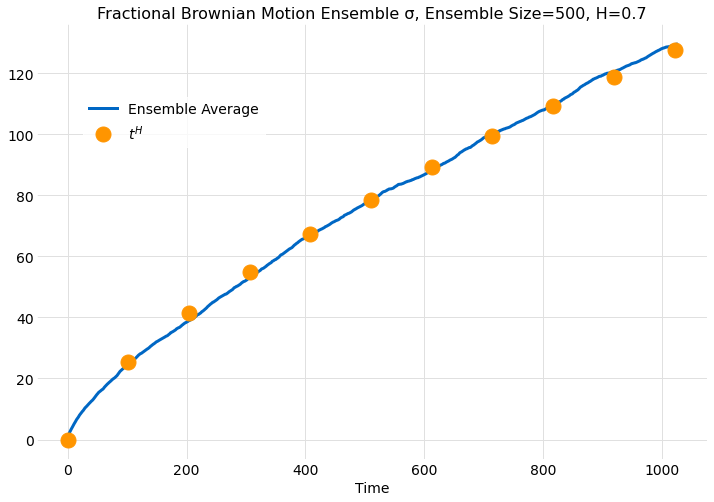

In [28]:
std = stats.ensemble_std(samples)
title = f"Fractional Brownian Motion Ensemble σ, Ensemble Size={nsims}, H={format(H, '1.1f')}"
ensemble_std_plot(H, std, time, [0.35, 0.85], title)

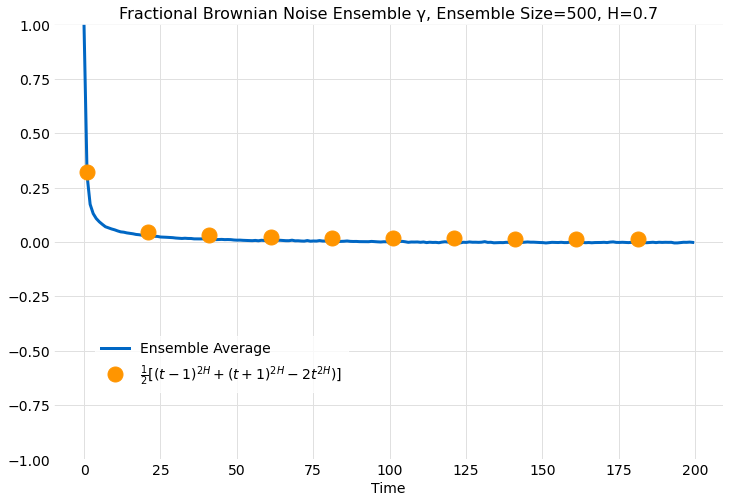

In [29]:
ac = stats.ensemble_autocorrelation(fbm.to_noise(samples))
title = f"Fractional Brownian Noise Ensemble γ, Ensemble Size={nsims}, H={format(H, '1.1f')}"
ensemble_autocorrelation_plot(H, ac[:200], time[:200], [0.45, 0.3], title)

## H=0.3

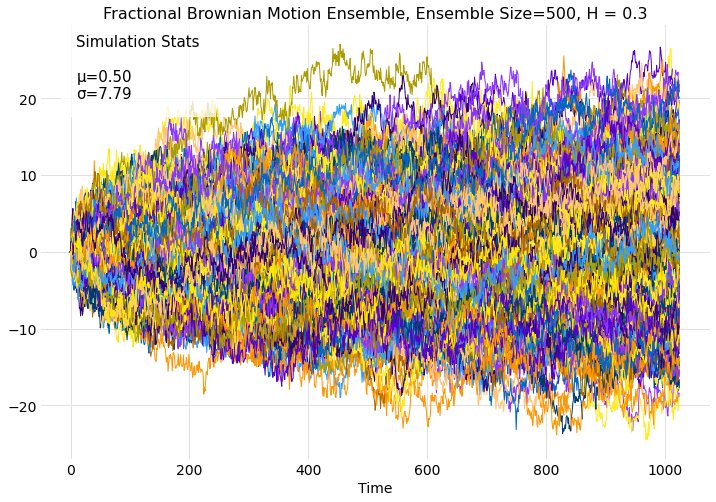

In [32]:
H=0.3
title = f"Fractional Brownian Motion Ensemble, Ensemble Size={nsims}, H = {format(H, '1.1f')}"
samples = generate_ensemble(H)
ensemble_plot(samples, time, [10.0, 20.0], title)

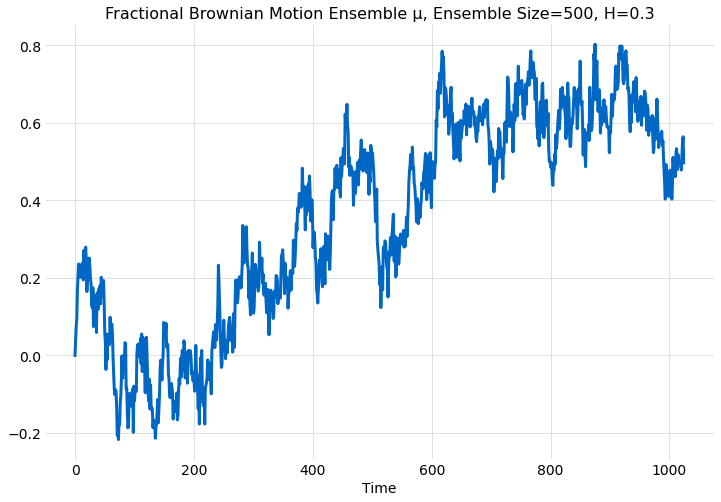

In [33]:
mean = stats.ensemble_mean(samples)
title = f"Fractional Brownian Motion Ensemble μ, Ensemble Size={nsims}, H={format(H, '1.1f')}"
ensemble_mean_plot(mean, time, title)

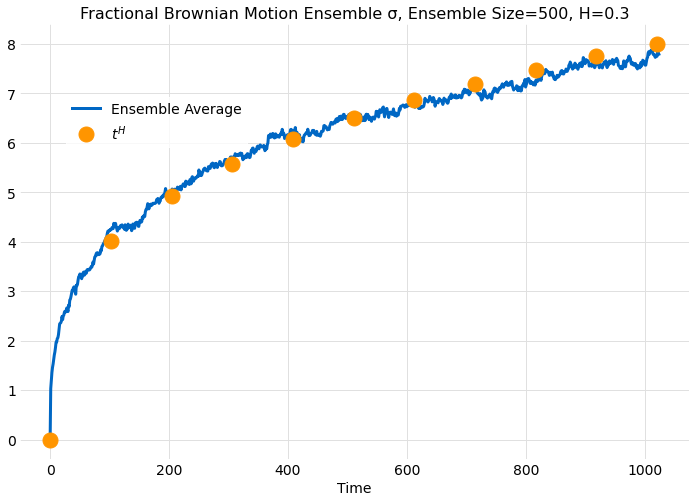

In [34]:
std = stats.ensemble_std(samples)
title = f"Fractional Brownian Motion Ensemble σ, Ensemble Size={nsims}, H={format(H, '1.1f')}"
ensemble_std_plot(H, std, time, [0.35, 0.85], title)

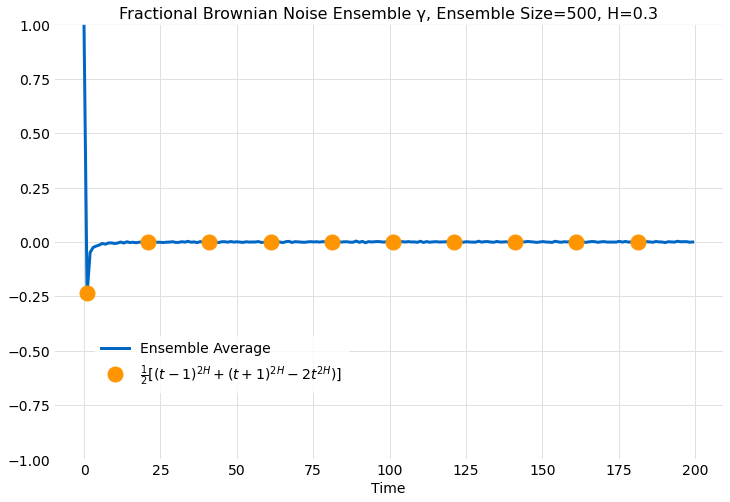

In [35]:
ac = stats.ensemble_autocorrelation(fbm.to_noise(samples))
title = f"Fractional Brownian Noise Ensemble γ, Ensemble Size={nsims}, H={format(H, '1.1f')}"
ensemble_autocorrelation_plot(H, ac[:200], time[:200], [0.45, 0.3], title)